### PCA Demonstration in Python

In [2]:
#importing the required libraries
import numpy as np, pandas as pd

In [3]:
data = pd.read_csv('housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### Scaling the data as this is a required step for PCA

In [6]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
varlist = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

def binary_map(x):
    return x.map({'yes':1, 'no':0})

In [8]:
data[varlist] = data[varlist].apply(binary_map)

In [9]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['furnishingstatus'] = le.fit_transform(data['furnishingstatus'])

In [11]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X = data.copy()

In [14]:
x = scaler.fit_transform(X)

In [47]:
x.shape

(545, 13)

In [16]:
dfx = pd.DataFrame(x, columns=X.columns)

In [17]:
dfx

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,1.222962
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.091662
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.222962
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-1.406286


### Applying PCA on data

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(random_state=100)
pca.fit(x)

PCA(random_state=100)

In [20]:
pca.components_

array([[ 4.98821265e-01,  3.39663353e-01,  2.85683417e-01,
         3.27792982e-01,  2.75428131e-01,  2.18777287e-01,
         1.99161743e-01,  1.41707884e-01,  2.44188941e-02,
         2.94216387e-01,  2.68892326e-01,  2.22950084e-01,
        -2.32600149e-01],
       [-2.62300882e-02,  1.54072471e-01, -3.35176047e-01,
        -2.60339271e-01, -4.87938789e-01,  2.14913075e-01,
         3.56588719e-01,  4.82051840e-01, -9.43473547e-02,
        -9.23739631e-02,  7.31203905e-02,  3.45490523e-01,
        -9.75094326e-02],
       [-2.62250886e-02, -3.47202548e-01,  3.07333935e-01,
         2.45126232e-01,  7.39370963e-02, -4.22974992e-01,
         4.21328624e-01,  4.76822901e-01,  4.61150349e-02,
        -2.71898092e-02, -3.59082470e-01,  2.83979077e-04,
         5.62406342e-02],
       [ 3.27644934e-02,  4.45981804e-02,  6.47021528e-02,
         1.43864545e-01, -1.94008727e-01, -4.18733810e-02,
        -5.46816299e-02,  9.78382337e-02,  7.75119714e-01,
        -4.29684931e-01,  2.94973717e

In [21]:
help(pca)

Help on PCA in module sklearn.decomposition._pca object:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |
 |  Principal component analysis (PCA).
 |
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |
 |  For a us

In [22]:
pca.explained_variance_ratio_

array([0.24623558, 0.11812995, 0.09839752, 0.08719842, 0.06892542,
       0.06762765, 0.06244855, 0.05756493, 0.05008978, 0.04892918,
       0.04411525, 0.03248196, 0.01785581])

##### the above output shows the percentage of the contribution of each component(feature)

In [25]:
pd.DataFrame(list(zip(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)), columns=('component','variance_ratio'))

,component,variance_ratio
0,1,0.246236
1,2,0.118130
2,3,0.098398
3,4,0.087198
4,5,0.068925
5,6,0.067628
6,7,0.062449
7,8,0.057565
8,9,0.050090
9,10,0.048929


In [26]:
###thus each of the components has a corresponding percentage of information it carries

In [28]:
import matplotlib.pyplot as plt

<BarContainer object of 13 artists>

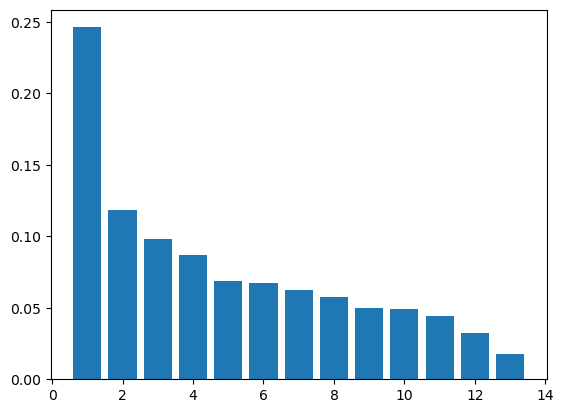

In [30]:
plt.bar((range(1, len(pca.explained_variance_ratio_)+1)), pca.explained_variance_ratio_)

In [31]:
## this a visual representation of the variance information of each of the components

In [32]:
##Making a skree plot which has the cumulative distribution of the components and their contributing weight of information to the data

In [34]:
##calculating the cumulative percentages for accuracy as explained by the components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.24623558, 0.36436553, 0.46276305, 0.54996147, 0.61888689,
       0.68651454, 0.74896309, 0.80652802, 0.8566178 , 0.90554699,
       0.94966223, 0.98214419, 1.        ])

In [35]:
##so with this, the first index in the array shows the percentage of information contained by the first component that can explain the target variable
##the second value is an addition of the first component's value and the second componehnt's value of 11% and so.  Hence cumulatively, we 
## will be able to see what number of components we should retain to achieve a high model accuracy.

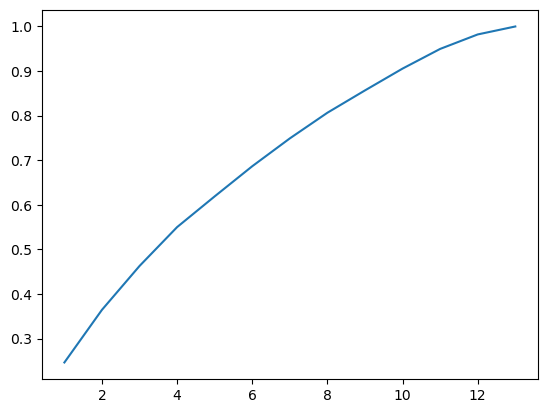

In [36]:
plt.plot(range(1, len(var_cumu)+1), var_cumu)

In [37]:
###hence from the above, if we retain say 10 compomnents, we will have 90% of the information from the original dataset

##### PCA with 10 components

In [38]:
##create the PCA object and put in the number of components that we want to retain, our is to recast the original dataset
pc2 = PCA(n_components=10, random_state=100)

In [42]:
#recasting the PCA findings of the selected components unto our original scaled dataset.
## this will reduce the dimensions as inscribed by the hyperparameter 'n_components
##w we know that retaining 10  components retains 90% of information from our original dataset
newdata = pc2.fit_transform(x)

In [40]:
newdata

array([[ 5.33743015, -1.14802843, -0.99300641, ...,  1.19116148,
         0.24113181,  0.29934805],
       [ 6.70856907, -3.35409168, -0.58081397, ..., -0.88319043,
         1.53270145,  2.09818064],
       [ 4.10802104,  1.14566095, -0.75528847, ...,  0.16270091,
         0.98498306,  0.7818922 ],
       ...,
       [-2.79964971,  0.25520727, -0.67487061, ..., -0.48166734,
         0.23271547,  0.52332968],
       [-2.53999063, -0.61042447,  0.92209209, ...,  0.83920565,
         0.66817622, -0.85060906],
       [-2.05839994, -0.74598161, -0.209605  , ..., -0.8255094 ,
        -0.33872929, -0.20166861]])

In [41]:
newdata.shape

(545, 10)

##### Making a dataframe out of it for convenience

In [43]:
df = pd.DataFrame(newdata, columns=('PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'))
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,5.337430,-1.148028,-0.993006,-0.331164,-0.134794,0.110877,-1.093159,1.191161,0.241132,0.299348
1,6.708569,-3.354092,-0.580814,0.789837,1.314300,1.185436,-0.278182,-0.883190,1.532701,2.098181
2,4.108021,1.145661,-0.755288,0.799066,-0.941418,1.617928,-1.156227,0.162701,0.984983,0.781892
3,5.351939,0.531168,-0.493661,0.423046,0.643445,1.079673,-1.459042,0.971540,-0.832988,0.915714
4,4.153940,1.087694,0.560158,0.050823,1.709492,-0.035171,0.982522,-0.109177,-0.862629,-1.230622
...,...,...,...,...,...,...,...,...,...,...
540,-1.956330,1.390407,-0.411481,0.568987,0.315944,1.101106,0.337768,-0.786177,-1.586324,1.090469
541,-2.921091,-0.775095,1.077457,0.042585,0.985497,0.299927,-0.948289,0.755425,0.376565,-0.658376
542,-2.799650,0.255207,-0.674871,-0.309902,-0.539939,0.062952,0.592955,-0.481667,0.232715,0.523330
543,-2.539991,-0.610424,0.922092,0.222094,1.689646,-0.478822,-1.484519,0.839206,0.668176,-0.850609


In [45]:
df.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
PC1,1.000000e+00,2.848240e-16,-8.219759e-17,-8.319941e-17,-7.216997e-19,1.619902e-16,-7.304014e-17,1.816331e-17,1.339019e-16,3.604727e-17
PC2,2.848240e-16,1.000000e+00,1.306646e-16,-2.173896e-16,1.158314e-16,-1.341517e-16,7.991040e-17,-1.531604e-16,-3.361242e-18,2.194593e-16
PC3,-8.219759e-17,1.306646e-16,1.000000e+00,-5.130934e-16,2.568753e-16,-1.877639e-16,-7.867393e-17,3.825839e-17,-2.544536e-17,2.387093e-16
PC4,-8.319941e-17,-2.173896e-16,-5.130934e-16,1.000000e+00,5.022879e-16,4.119488e-16,-2.407533e-17,9.123491e-17,5.245958e-17,8.063673e-17
PC5,-7.216997e-19,1.158314e-16,2.568753e-16,5.022879e-16,1.000000e+00,-4.157592e-16,5.162674e-16,-3.492760e-16,2.238859e-16,-5.960633e-16
PC6,1.619902e-16,-1.341517e-16,-1.877639e-16,4.119488e-16,-4.157592e-16,1.000000e+00,-9.526803e-17,2.719145e-16,2.264193e-16,-4.389303e-16
PC7,-7.304014e-17,7.991040e-17,-7.867393e-17,-2.407533e-17,5.162674e-16,-9.526803e-17,1.000000e+00,-7.660304e-16,-1.744110e-16,2.083769e-16
PC8,1.816331e-17,-1.531604e-16,3.825839e-17,9.123491e-17,-3.492760e-16,2.719145e-16,-7.660304e-16,1.000000e+00,4.070905e-17,4.105617e-16
PC9,1.339019e-16,-3.361242e-18,-2.544536e-17,5.245958e-17,2.238859e-16,2.264193e-16,-1.744110e-16,4.070905e-17,1.000000e+00,4.311108e-16
PC10,3.604727e-17,2.194593e-16,2.387093e-16,8.063673e-17,-5.960633e-16,-4.389303e-16,2.083769e-16,4.105617e-16,4.311108e-16,1.000000e+00


In [46]:
##as we can see from the correlation matrix, all of the components have negligible correlation

### we ensure that we do not include our target feature in the PCA process.